# Exploratory data analysis 
### File: 'estaticos_market.csv'

Eventhough this is a initial exploratory analysis, some data preparation has been performed, removing features according to the criteria described below.

## Summary

1. Data preparation - removing non-informative variables 
    * Redundancy
    * All NAs
    * All NAs and/or zeros
    * Same value for all entries

In [2]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

 Input data is named: **market**

In [3]:
market=pd.read_csv("estaticos_market.csv")

Initial data size

In [4]:
market.shape

(462298, 182)

**[id]** variable defines the "name" for each instance

Find if there are any repeated [id] in the data

In [5]:
sum(market['id'].value_counts()>1)

0

## Part 1

In this part, non-informative variables are removed.
Later, a study on the number of features as a function of 'nan' is performed.

### Removing non-informative attributes

**[Unnamed: 0]** Redundant variable, same values as index

In [6]:
market=market.drop(['Unnamed: 0'],axis=1)

**market_fill**: count the number of filled instances for each variable

Consider variables with at least one instance, i.e. exclude variables with all NAs


In [7]:
market_fill=market.count()
market_fill[market_fill==0]

qt_alteracao_socio_total             0
qt_alteracao_socio_90d               0
qt_alteracao_socio_180d              0
qt_alteracao_socio_365d              0
grau_instrucao_macro_desconhecido    0
dtype: int64

Removing variables above

In [8]:
market=market[market_fill[market_fill>0].index]

Number of unique values in each variable

In [9]:
market_unique=market.T.apply(lambda x: x.nunique(), axis=1)

Remove variables that contains just one unique value and/or NAs

In [10]:
list_one=market_unique.index[market_unique.values==1]

In [11]:
for i in list_one:
    print(i + '\t' +str(market[i].unique()))

fl_epp	[False]
qt_coligados_nula	[ 0. nan]
qt_coligados_atividade_alto	[ 0. nan]
qt_coligados_atividade_medio	[ 0. nan]
qt_coligados_atividade_baixo	[ 0. nan]
qt_coligados_atividade_mt_baixo	[ 0. nan]
qt_coligados_atividade_inativo	[ 0. nan]


In [12]:
market=market[market_unique[market_unique>1].index]
market.shape

(462298, 169)

Check if there is any instance with all NAs

In [13]:
sum(market.drop(['id'],axis=1).count(axis=1)==0)

0

The following plot shows the number of features that have at least a given percentage of values (i.e. not nan).

Notice that there are only around 60 features with at least 20% of data not nan.

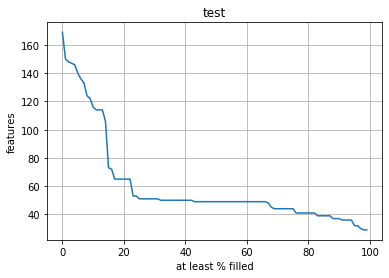

In [14]:
count_market=market.count()
count_market_max=max(count_market)
index = range(0,100)
columns = ['count_features']
n_features = pd.DataFrame(index=index, columns=columns)
for i in range(0,100):
    threshsold=round(i*count_market_max/100)
    n_features.values[i]=sum(count_market>threshsold)
fig, ax = plt.subplots()
ax.plot(n_features)
ax.set(xlabel='at least % filled', ylabel='features',
       title='test')
ax.grid()
    

## Part 2

In this second part, the remaining variables are analysed by type.
Since there are almost 30 variables type 'object', they were plotted in interactive way.

Next, the 'float' type variables are correlated among thenselves to check possible redundant ones.

### Variables types

In [15]:
market_types=market.dtypes.value_counts()
market_types

float64    133
object      27
bool         8
int64        1
dtype: int64

### object type variables

In [16]:
market.dtypes[market.dtypes=='object']

id                                     object
de_natureza_juridica                   object
sg_uf                                  object
natureza_juridica_macro                object
de_ramo                                object
setor                                  object
idade_emp_cat                          object
dt_situacao                            object
fl_rm                                  object
nm_divisao                             object
nm_segmento                            object
fl_spa                                 object
fl_antt                                object
fl_veiculo                             object
fl_optante_simples                     object
fl_optante_simei                       object
sg_uf_matriz                           object
de_saude_tributaria                    object
de_saude_rescencia                     object
de_nivel_atividade                     object
de_indicador_telefone                  object
fl_simples_irregular              

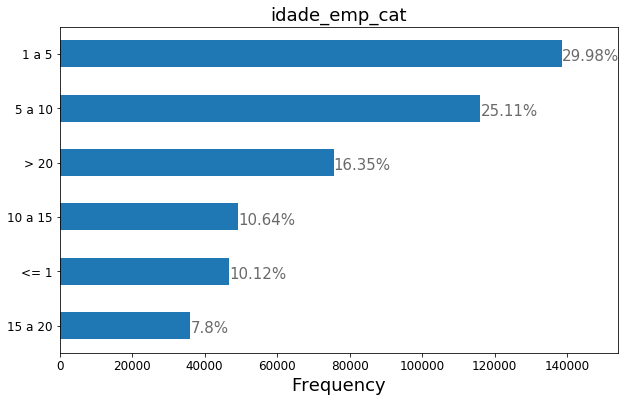

In [25]:
input_object_variable='idade_emp_cat'
ax = market[input_object_variable].value_counts().plot(kind='barh', 
                                                       figsize=(10,len(market[input_object_variable].unique())),fontsize=12);
ax.set_alpha(0.8)
ax.set_title(input_object_variable, fontsize=18)
ax.set_xlabel("Frequency", fontsize=18)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')
ax.set_xlim(0,(market[input_object_variable].value_counts().max()+market[input_object_variable].value_counts().max()/9))
# invert for largest on top 
ax.invert_yaxis()


### float64 type variables 

In [27]:
market_float=market[market.dtypes[market.dtypes=='float64'].index]
corr_matrix = market_float.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

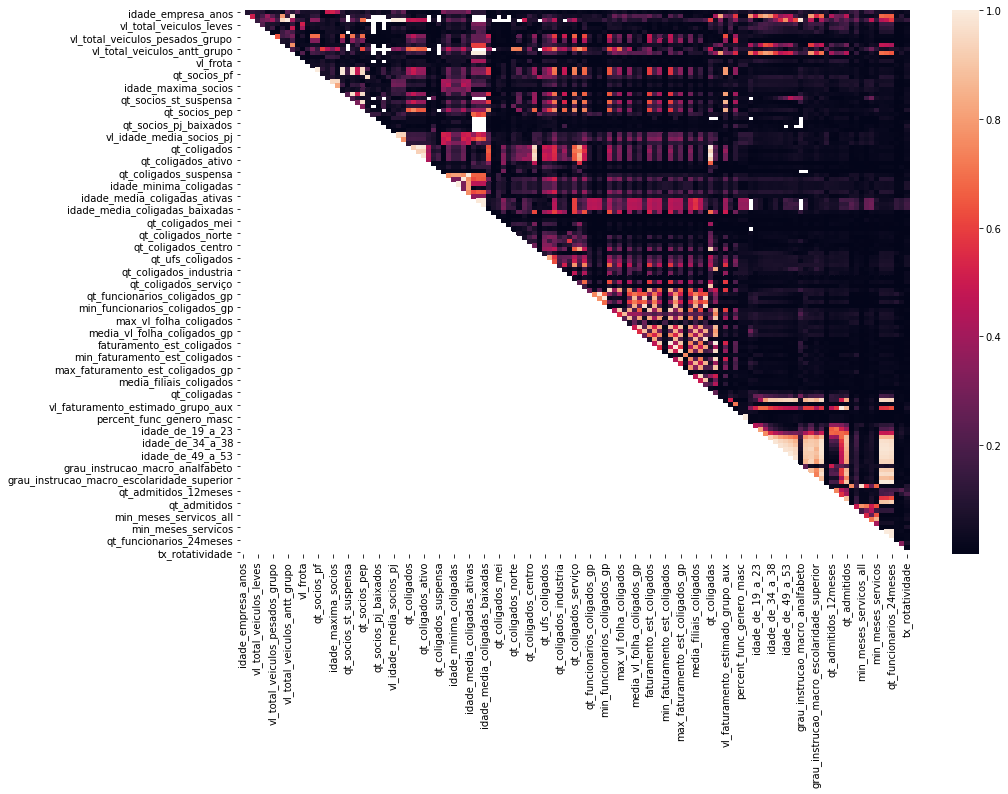

In [30]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(upper)

For the boolean variables, there are 5 that specifies the type of company (fl_me,fl_sa,fl_epp,fl_mei,fl_ltda). Therefore they were ploted together counting the 'True' instances.

The remaining varaibles (fl_matriz,fl_st_especial,fl_email,fl_telefone) were ploted 'True' 'False' proportion.

In [25]:
market_bool=market[market.dtypes[market.dtypes=='bool'].index] 
market_bool.dtypes

fl_matriz         bool
fl_me             bool
fl_sa             bool
fl_mei            bool
fl_ltda           bool
fl_st_especial    bool
fl_email          bool
fl_telefone       bool
dtype: object

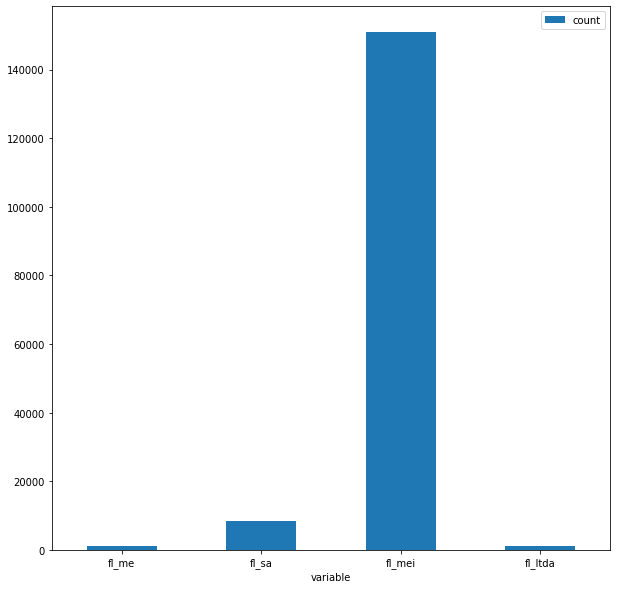

In [38]:
count_fl_me=sum(market_bool['fl_me']==True)
count_fl_sa=sum(market_bool['fl_sa']==True)
count_fl_mei=sum(market_bool['fl_mei']==True)
count_fl_ltda=sum(market_bool['fl_ltda']==True)

df = pd.DataFrame({'variable':['fl_me', 'fl_sa', 'fl_mei','fl_ltda'], 'count':[count_fl_me, count_fl_sa, count_fl_mei,count_fl_ltda]})
df.plot.bar(x='variable', y='count', rot=0,figsize=(10,10))


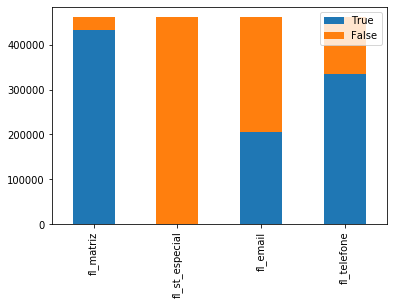

In [65]:
bool_out=pd.DataFrame(index=['fl_matriz','fl_st_especial','fl_email','fl_telefone'],columns=['True', 'False'])
bool_out['True']['fl_matriz']=sum(market_bool['fl_matriz']==True)
bool_out['False']['fl_matriz']=sum(market_bool['fl_matriz']==False)
bool_out['True']['fl_st_especial']=sum(market_bool['fl_st_especial']==True)
bool_out['False']['fl_st_especial']=sum(market_bool['fl_st_especial']==False)
bool_out['True']['fl_email']=sum(market_bool['fl_email']==True)
bool_out['False']['fl_email']=sum(market_bool['fl_email']==False)
bool_out['True']['fl_telefone']=sum(market_bool['fl_telefone']==True)
bool_out['False']['fl_telefone']=sum(market_bool['fl_telefone']==False)
bool_out.plot.bar(stacked=True)